#Import Library

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Data Understanding

In [ ]:
df = pd.read_csv('/content/Dataset7_Airline_Satisfaction.csv')

In [ ]:
df.head()

,Customer Type,Class,Gender,Age,Type of Travel,Flight Distance,Checkin service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Loyal Customer,Eco,Female,65,Personal Travel,265,5,0,0.0,satisfied
1,Loyal Customer,Business,Male,47,Personal Travel,2464,2,310,305.0,satisfied
2,Loyal Customer,Eco,Female,15,Personal Travel,2138,4,0,0.0,satisfied
3,Loyal Customer,Eco,Female,60,Personal Travel,623,4,0,0.0,satisfied
4,Loyal Customer,Eco,Female,70,Personal Travel,354,4,0,0.0,satisfied


In [ ]:
df.isnull().sum()

Customer Type                   0
Class                           0
Gender                          0
Age                             0
Type of Travel                  0
Flight Distance                 0
Checkin service                 0
Departure Delay in Minutes      0
Arrival Delay in Minutes      393
satisfaction                    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Customer Type               129880 non-null  object 
 1   Class                       129880 non-null  object 
 2   Gender                      129880 non-null  object 
 3   Age                         129880 non-null  int64  
 4   Type of Travel              129880 non-null  object 
 5   Flight Distance             129880 non-null  int64  
 6   Checkin service             129880 non-null  int64  
 7   Departure Delay in Minutes  129880 non-null  int64  
 8   Arrival Delay in Minutes    129487 non-null  float64
 9   satisfaction                129880 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 9.9+ MB


In [ ]:
df['satisfaction'].value_counts()

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

In [ ]:
#merubah satisfacion menjadi numerik
df['satisfaction'].replace(['dissatisfied','satisfied'],[0,1],inplace=True)

In [ ]:
df.head()

,Customer Type,Class,Gender,Age,Type of Travel,Flight Distance,Checkin service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Loyal Customer,Eco,Female,65,Personal Travel,265,5,0,0.0,1
1,Loyal Customer,Business,Male,47,Personal Travel,2464,2,310,305.0,1
2,Loyal Customer,Eco,Female,15,Personal Travel,2138,4,0,0.0,1
3,Loyal Customer,Eco,Female,60,Personal Travel,623,4,0,0.0,1
4,Loyal Customer,Eco,Female,70,Personal Travel,354,4,0,0.0,1


In [ ]:
df['satisfaction'].value_counts()

1    71087
0    58793
Name: satisfaction, dtype: int64

In [ ]:
#missing values handling
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())

In [ ]:
df.isnull().sum()

Customer Type                 0
Class                         0
Gender                        0
Age                           0
Type of Travel                0
Flight Distance               0
Checkin service               0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
satisfaction                  0
dtype: int64

#EDA

##Pembagian Fitur Berdasarkan Tipe Data

In [ ]:
df.head()

,Customer Type,Class,Gender,Age,Type of Travel,Flight Distance,Checkin service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Loyal Customer,Eco,Female,65,Personal Travel,265,5,0,0.0,1
1,Loyal Customer,Business,Male,47,Personal Travel,2464,2,310,305.0,1
2,Loyal Customer,Eco,Female,15,Personal Travel,2138,4,0,0.0,1
3,Loyal Customer,Eco,Female,60,Personal Travel,623,4,0,0.0,1
4,Loyal Customer,Eco,Female,70,Personal Travel,354,4,0,0.0,1


In [ ]:
numerical_feats = df.dtypes[df.dtypes != 'object'].index
print('Jumlah Numerical Features: ', len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == 'object'].index
print('Jumlah Categorical Features: ', len(categorical_feats))

Jumlah Numerical Features:  6
Jumlah Categorical Features:  4


##Satisfaction Category

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Customer Type               129880 non-null  object 
 1   Class                       129880 non-null  object 
 2   Gender                      129880 non-null  object 
 3   Age                         129880 non-null  int64  
 4   Type of Travel              129880 non-null  object 
 5   Flight Distance             129880 non-null  int64  
 6   Checkin service             129880 non-null  int64  
 7   Departure Delay in Minutes  129880 non-null  int64  
 8   Arrival Delay in Minutes    129880 non-null  float64
 9   satisfaction                129880 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 9.9+ MB


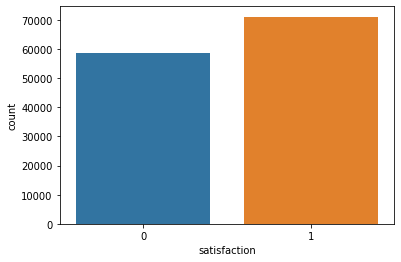

In [ ]:
#membandingkan jumlah customer satisfcation
sns.countplot('satisfaction',data=df)
plt.show()

In [ ]:
df.satisfaction.value_counts()

1    71087
0    58793
Name: satisfaction, dtype: int64

##Analyzing Features

###Customer Type

In [ ]:
df.groupby(['Customer Type','satisfaction'])['satisfaction'].count()

Customer Type      satisfaction
Loyal Customer     0               40713
                   1               65387
disloyal Customer  0               18080
                   1                5700
Name: satisfaction, dtype: int64

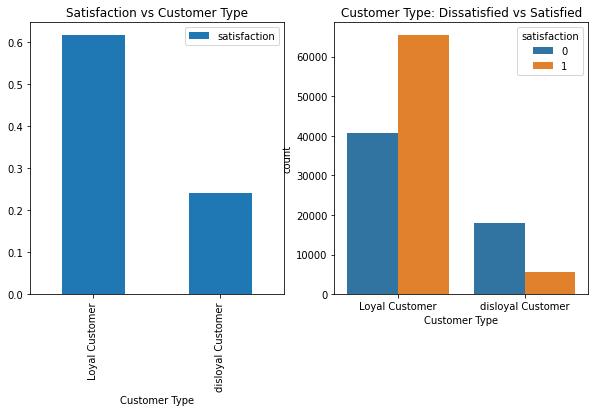

In [ ]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df[['Customer Type','satisfaction']].groupby(['Customer Type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Satisfaction vs Customer Type')
sns.countplot('Customer Type',hue='satisfaction',data=df,ax=ax[1])
ax[1].set_title('Customer Type: Dissatisfied vs Satisfied')
plt.show()

**Kesimpulan Customer Type :**

Berdasarkan grafik di atas, terlihat bahwa Loyal Customer cenderung untuk satisfied, sementara disloyal customer memiliki kecenderungan merasa dissatisfied.

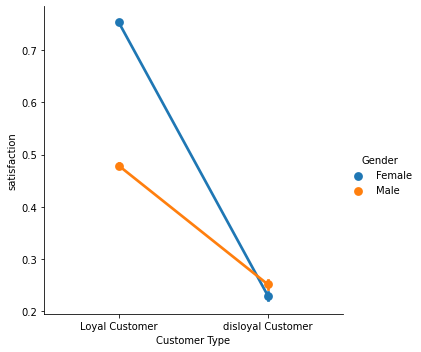

In [ ]:
sns.factorplot('Customer Type','satisfaction',hue='Gender',data=df)
plt.show()

Berdasarkan grafik di atas, terlihat bahwa loyal customer wanita memiliki tingkat satisfaction yang jauh lebih tinggi dari laki-laki.

###Class

In [ ]:
df['Class'].value_counts()

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64

In [ ]:
df.groupby(['Class', 'satisfaction'])['satisfaction'].count()

Class     satisfaction
Business  0               18065
          1               44095
Eco       0               35336
          1               22973
Eco Plus  0                5392
          1                4019
Name: satisfaction, dtype: int64

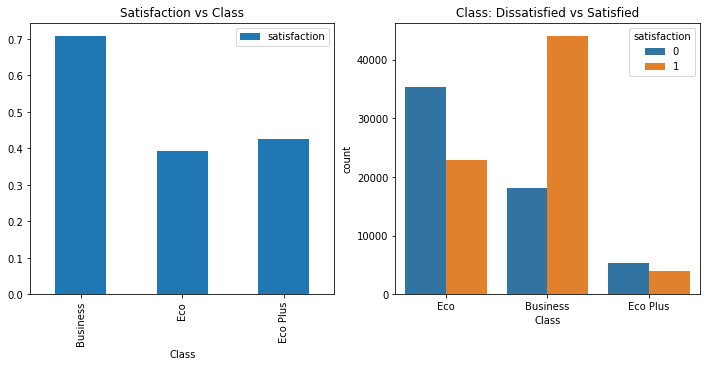

In [ ]:
f,ax=plt.subplots(1,2,figsize=(12,5))
df[['Class','satisfaction']].groupby(['Class']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Satisfaction vs Class')
sns.countplot('Class',hue='satisfaction',data=df,ax=ax[1])
ax[1].set_title('Class: Dissatisfied vs Satisfied')
plt.show()

**Kesimpulan Class :**

Berdasarkan grafik di atas, terlihat bahwa terdapat hubungan antara kelas pesawat dengan satisfaction pelanggan. Semakin tinggi kelas pesawat, semakin tinggi pula tingkat kepuasan pelanggan.

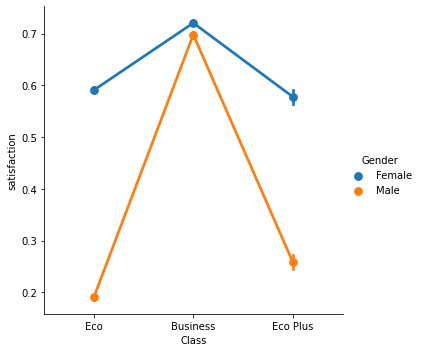

In [ ]:
sns.factorplot('Class','satisfaction',hue='Gender',data=df)
plt.show()

Berdasarkan grafik di atas, terlihat bahwa penumpang wanita cenderung lebih satisfied dibandingkan dengan penumpang laki-laki. Satisfaction anta gender juga dipengaruhi oleh kelas pesawat.

###Gender

In [ ]:
df.groupby(['Gender', 'satisfaction'])['satisfaction'].count()

Gender  satisfaction
Female  0               22971
        1               42928
Male    0               35822
        1               28159
Name: satisfaction, dtype: int64

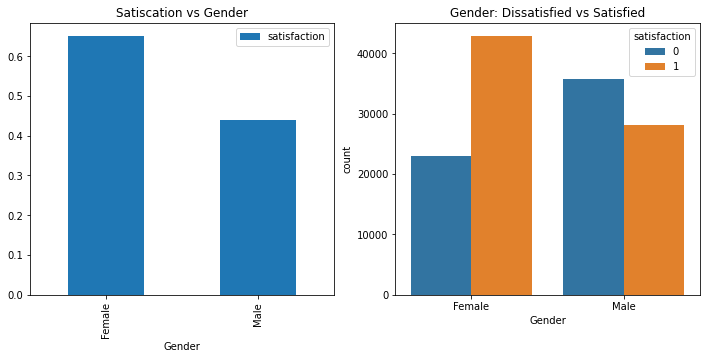

In [ ]:
f,ax=plt.subplots(1,2,figsize=(12,5))
df[['Gender','satisfaction']].groupby(['Gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Satiscation vs Gender')
sns.countplot('Gender',hue='satisfaction',data=df,ax=ax[1])
ax[1].set_title('Gender: Dissatisfied vs Satisfied')
plt.show()

**Kesimpulan Gender :**

Berdasarkan grafik di atas, terlihat bahwa penumpang wanita cenderung lebih satisfied dibandingkan dengan penumpang pria.

###Age

In [ ]:
print('Oldest Passenger was of:',df['Age'].max(),'Years')
print('Youngest Passenger was of:',df['Age'].min(),'Years')
print('Average Age on the plane:',df['Age'].mean(),'Years')

Oldest Passenger was of: 85 Years
Youngest Passenger was of: 7 Years
Average Age on the plane: 39.42795657530028 Years


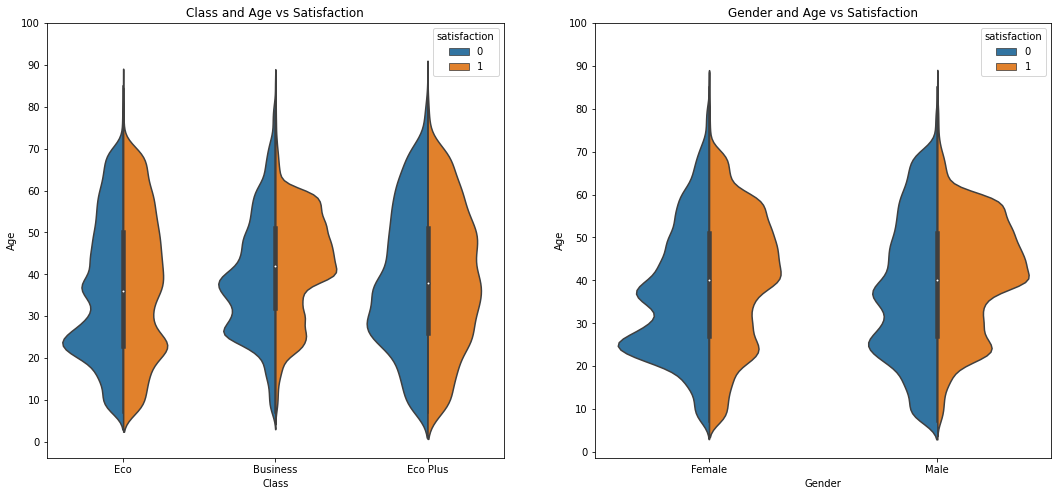

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Class","Age", hue="satisfaction", data=df,split=True,ax=ax[0])
ax[0].set_title('Class and Age vs Satisfaction')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Gender","Age", hue="satisfaction", data=df,split=True,ax=ax[1])
ax[1].set_title('Gender and Age vs Satisfaction')
ax[1].set_yticks(range(0,110,10))
plt.show()

**Analisis :**

1. Penumpang dengan usia < 20 tahun mayoritas berada di kelas eco dan eco plus.
2. Tingkat dissatisfied pelanggan di setiap kelas cenderung menurun seiring dengan pertambahan usia.
3. Pelanggan yang dissatisfied paling banyak berada di kisaran usia 20 - 40 tahun di setiap kelas (lebih banyak pelanggan wanita dibandingkan laki-laki).
4. Satisfaction pelanggan terbanyak ada pada usia 40 - 60 tahun, terutama di kelas bisnis.

###Type of Travel

In [ ]:
df.groupby(['Type of Travel','satisfaction'])['satisfaction'].count()

Type of Travel   satisfaction
Business travel  0               37337
                 1               52356
Personal Travel  0               21456
                 1               18731
Name: satisfaction, dtype: int64

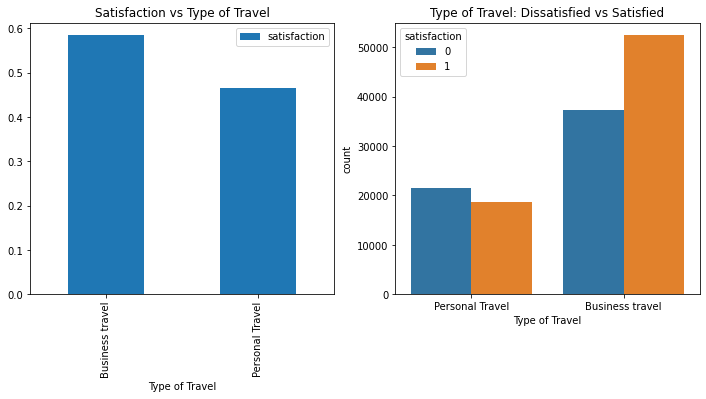

In [ ]:
f,ax=plt.subplots(1,2,figsize=(12,5))
df[['Type of Travel','satisfaction']].groupby(['Type of Travel']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Satisfaction vs Type of Travel')
sns.countplot('Type of Travel',hue='satisfaction',data=df,ax=ax[1])
ax[1].set_title('Type of Travel: Dissatisfied vs Satisfied')
plt.show()

Berdasarkan grafik di atas terlihat bahwa penumpang dengan kepentingan bisnis memiliki kecenderungan lebih puas jika dibandingkan dengan penumpang yang traveling dengan kebutuhan personal.

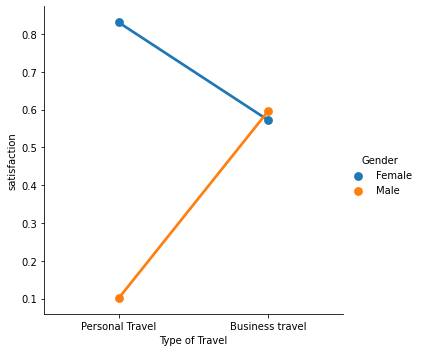

In [ ]:
sns.factorplot('Type of Travel','satisfaction',hue='Gender',data=df)
plt.show()

Grafik di atas menarik karena meskipun rata-rata penumpang dengan perjalanan bisnis cenderung lebih merasa puas, namun jika dilihat berdasarkan jenis kelamin, penumpang perempuan yang melakukan perjalanan personal justru lebih satisfied dibandingkan dengan penumpang wanita dengan urusana perjalanan bisnis. Kesimpulan ini bertolak belakang dengan penumpang laki-laki.

###Flight Distance

In [ ]:
print('Fartest distance was:',df['Flight Distance'].max())
print('Shortest distance was:',df['Flight Distance'].min())
print('Average distance was:',df['Flight Distance'].mean())

Fartest distance was: 6951
Shortest distance was: 50
Average distance was: 1981.409054511857


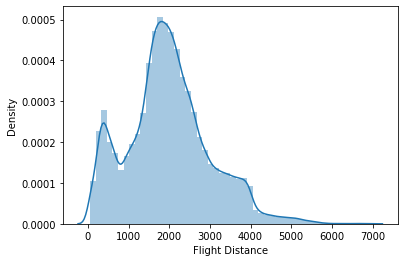

In [ ]:
sns.distplot(df['Flight Distance'])

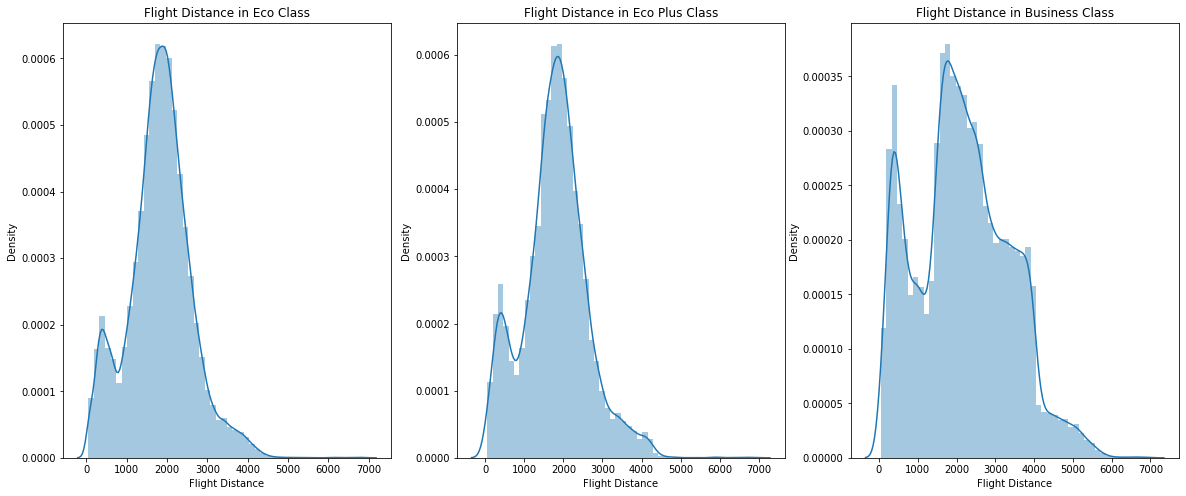

In [ ]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(df[df['Class']=='Eco']['Flight Distance'],ax=ax[0])
ax[0].set_title('Flight Distance in Eco Class')
sns.distplot(df[df['Class']=='Eco Plus']['Flight Distance'],ax=ax[1])
ax[1].set_title('Flight Distance in Eco Plus Class')
sns.distplot(df[df['Class']=='Business']['Flight Distance'],ax=ax[2])
ax[2].set_title('Flight Distance in Business Class')
plt.show()

**Analisis :**

1. Penumpang dengan tujuan jarak >3.000 km cenderung lebih memilih untuk naik dengan kelas bisnis
2. Penumpang dengan jarak tujuan < 1.000 km cenderung lebih memilih untuk naik dengan kelas bisnis

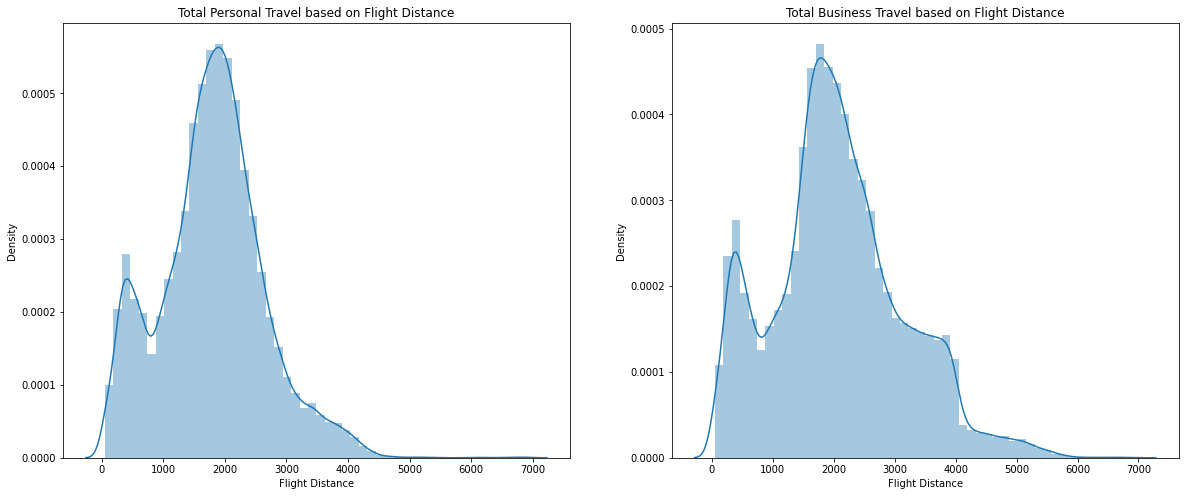

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(df[df['Type of Travel']=='Personal Travel']['Flight Distance'],ax=ax[0])
ax[0].set_title('Total Personal Travel based on Flight Distance')
sns.distplot(df[df['Type of Travel']=='Business travel']['Flight Distance'],ax=ax[1])
ax[1].set_title('Total Business Travel based on Flight Distance')
plt.show()

**Analisis :**

1. Perjalanan di > 3.000 km mayoritas untuk kepentingan bisnis.
2. Perjalan bisnis cenderung lebih memilih menggunakan kelas bisnis

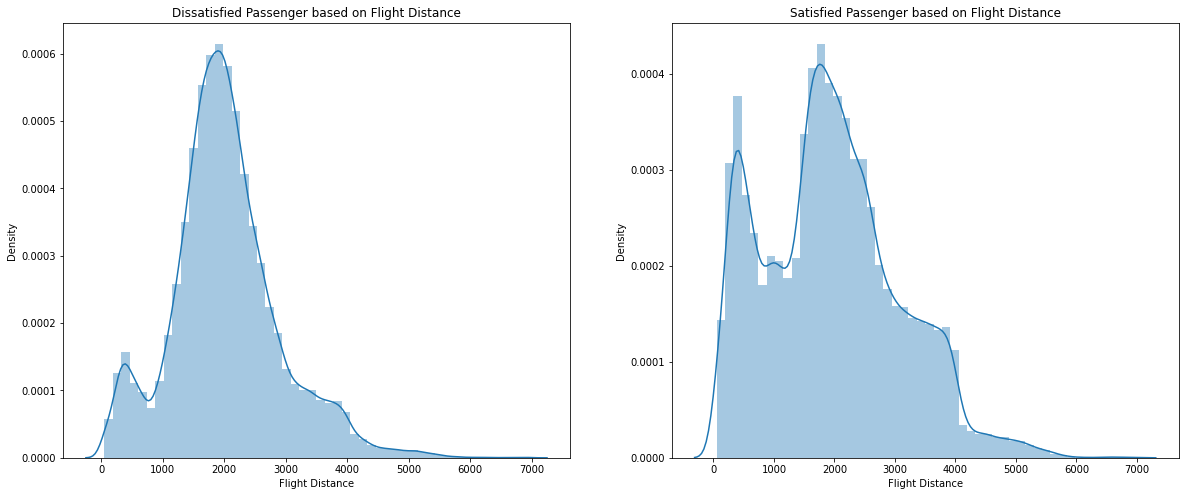

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(df[df['satisfaction']==0]['Flight Distance'],ax=ax[0])
ax[0].set_title('Dissatisfied Passenger based on Flight Distance')
sns.distplot(df[df['satisfaction']==1]['Flight Distance'],ax=ax[1])
ax[1].set_title('Satisfied Passenger based on Flight Distance')
plt.show()

Analisis :
1. Diperkirakan satisfaction level dipengaruhi oleh kelas pesawat, bukan jarak tempuh.

###Checkin Service

In [ ]:
df.groupby(['Checkin service', 'satisfaction'])['satisfaction'].count()

Checkin service  satisfaction
0                0                   1
1                0               10508
                 1                4861
2                0               10339
                 1                5147
3                0               15378
                 1               20160
4                0               15431
                 1               21050
5                0                7136
                 1               19869
Name: satisfaction, dtype: int64

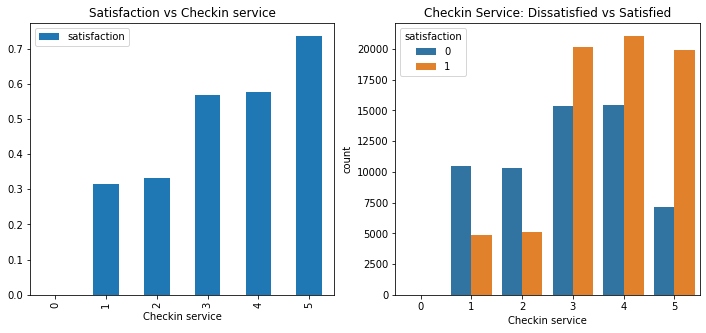

In [ ]:
f,ax=plt.subplots(1,2,figsize=(12,5))
df[['Checkin service','satisfaction']].groupby(['Checkin service']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Satisfaction vs Checkin service')
sns.countplot('Checkin service',hue='satisfaction',data=df,ax=ax[1])
ax[1].set_title('Checkin Service: Dissatisfied vs Satisfied')
plt.show()

**Analisis :**

1. Semakin besar nilai pelayanan saat check in, maka semakin meningkat pula kepuasan pelanggan.

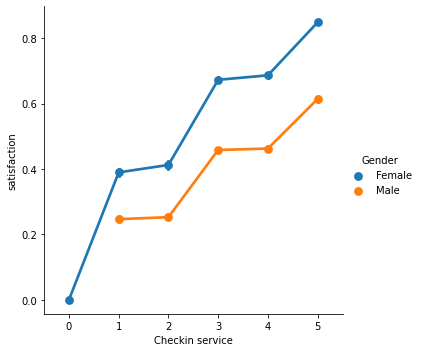

In [ ]:
sns.factorplot('Checkin service','satisfaction',hue='Gender',data=df)
plt.show()

###Departure Delay in Minutes

In [ ]:
print('Longest Departure Delay was:',df['Departure Delay in Minutes'].max())
print('Shortest Departure Delay was:',df['Departure Delay in Minutes'].min())
print('Average Departure Delay was:',df['Departure Delay in Minutes'].mean())

Longest Departure Delay was: 1592
Shortest Departure Delay was: 0
Average Departure Delay was: 14.713712657838004


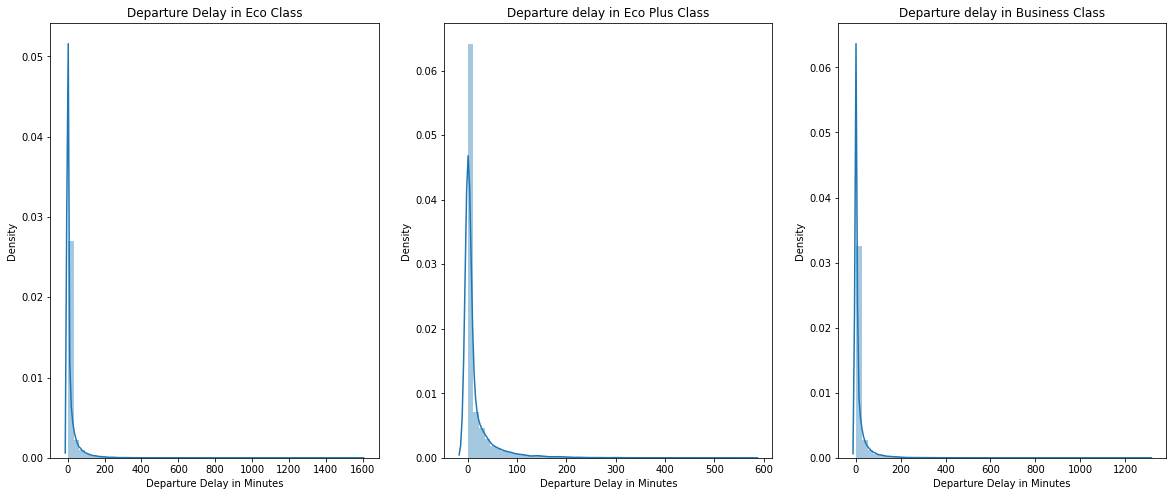

In [ ]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(df[df['Class']=='Eco']['Departure Delay in Minutes'],ax=ax[0])
ax[0].set_title('Departure Delay in Eco Class')
sns.distplot(df[df['Class']=='Eco Plus']['Departure Delay in Minutes'],ax=ax[1])
ax[1].set_title('Departure delay in Eco Plus Class')
sns.distplot(df[df['Class']=='Business']['Departure Delay in Minutes'],ax=ax[2])
ax[2].set_title('Departure delay in Business Class')
plt.show()

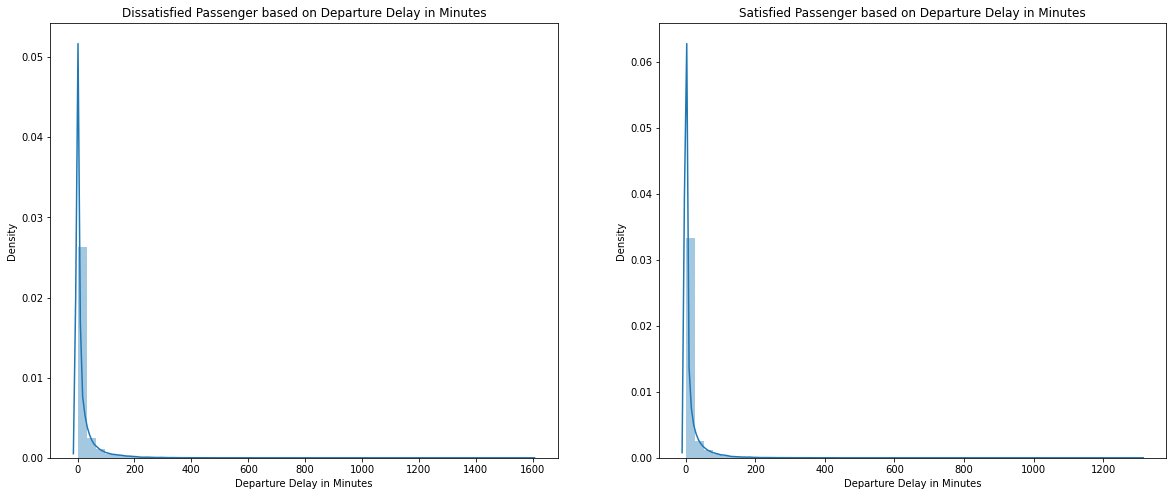

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(df[df['satisfaction']==0]['Departure Delay in Minutes'],ax=ax[0])
ax[0].set_title('Dissatisfied Passenger based on Departure Delay in Minutes')
sns.distplot(df[df['satisfaction']==1]['Departure Delay in Minutes'],ax=ax[1])
ax[1].set_title('Satisfied Passenger based on Departure Delay in Minutes')
plt.show()

**KESIMPULAN** tidak ada pengaruh antara departure delay in minutes dengan class dan satisfaction penumpang.

###Arrival Delay in Minutes

In [ ]:
print('Longest Arrival Delay was:',df['Arrival Delay in Minutes'].max())
print('Shortest Arrival Delay was:',df['Arrival Delay in Minutes'].min())
print('Average Arrival Delay was:',df['Arrival Delay in Minutes'].mean())

Longest Arrival Delay was: 1584.0
Shortest Arrival Delay was: 0.0
Average Arrival Delay was: 15.045465044656606


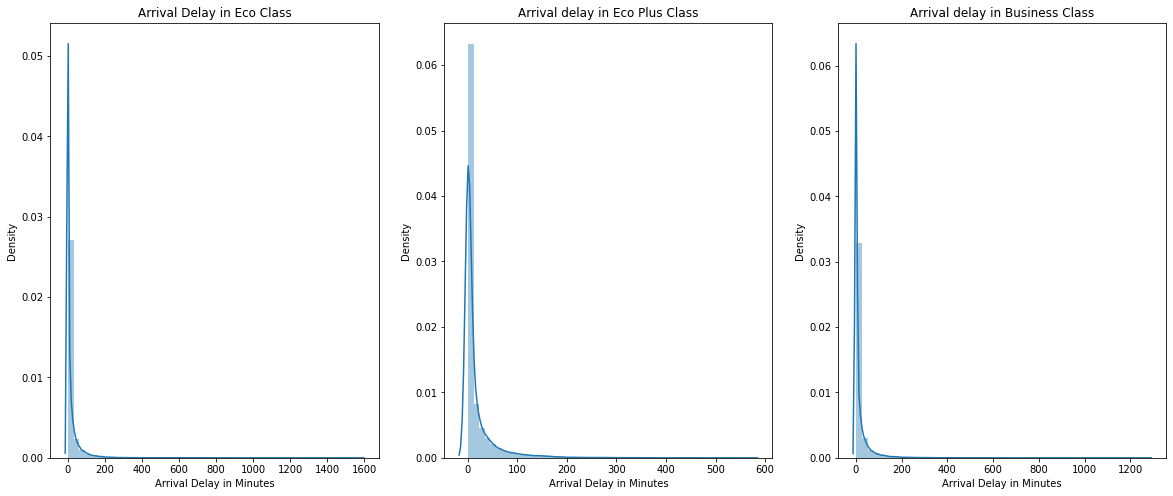

In [ ]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(df[df['Class']=='Eco']['Arrival Delay in Minutes'],ax=ax[0])
ax[0].set_title('Arrival Delay in Eco Class')
sns.distplot(df[df['Class']=='Eco Plus']['Arrival Delay in Minutes'],ax=ax[1])
ax[1].set_title('Arrival delay in Eco Plus Class')
sns.distplot(df[df['Class']=='Business']['Arrival Delay in Minutes'],ax=ax[2])
ax[2].set_title('Arrival delay in Business Class')
plt.show()

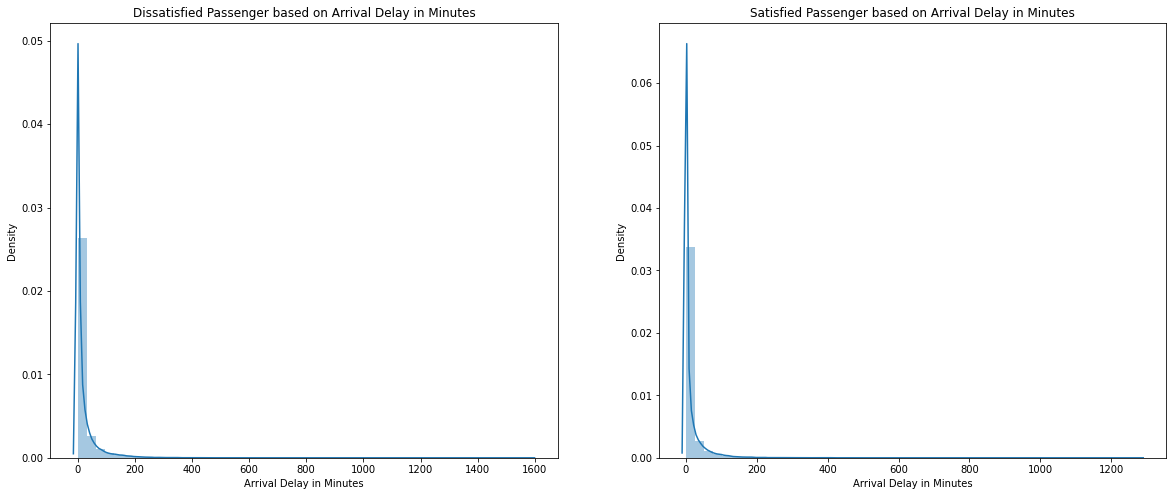

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(df[df['satisfaction']==0]['Arrival Delay in Minutes'],ax=ax[0])
ax[0].set_title('Dissatisfied Passenger based on Arrival Delay in Minutes')
sns.distplot(df[df['satisfaction']==1]['Arrival Delay in Minutes'],ax=ax[1])
ax[1].set_title('Satisfied Passenger based on Arrival Delay in Minutes')
plt.show()

**KESIMPULAN** tidak ada pengaruh antara arrival delay in minutes dengan class dan satisfaction penumpang.

##Boxplot numerical_feats

In [ ]:
df.shape

(129880, 10)

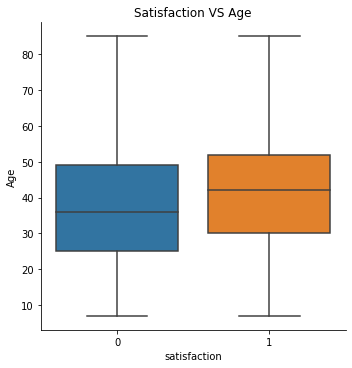

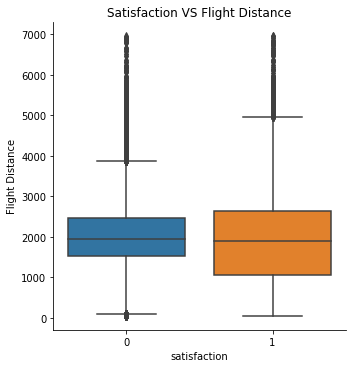

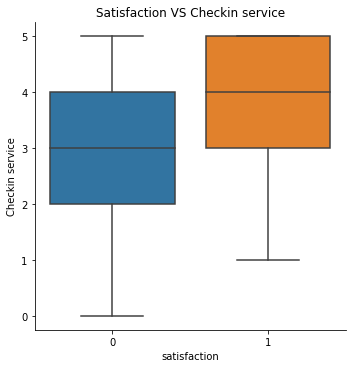

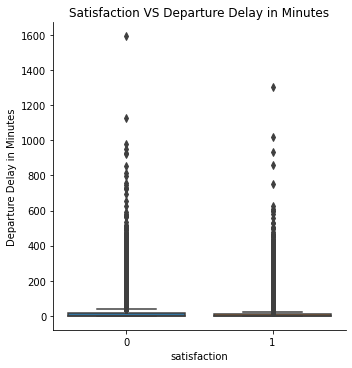

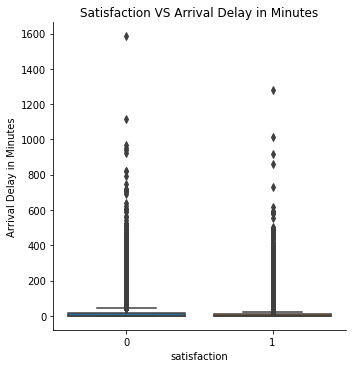

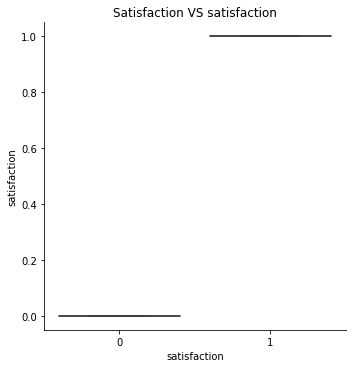

In [ ]:
#boxplot sebelum dilakukan outliers handling
for feature in numerical_feats:
    sns.catplot(x="satisfaction", y=feature, kind="box", data=df)
    plt.title('Satisfaction VS %s' % feature)
    plt.show()

##Cek skewness dan kurtosis

Skewness: -0.003606
Kurtosis: -0.719140


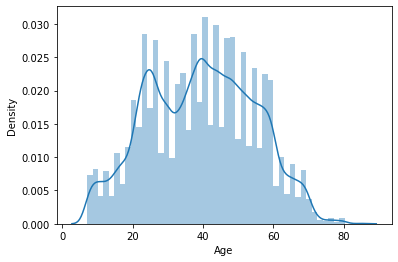

Skewness: 0.466748
Kurtosis: 0.364306


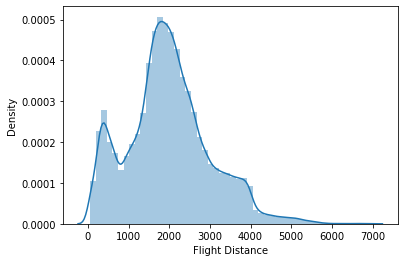

Skewness: -0.392442
Kurtosis: -0.793511


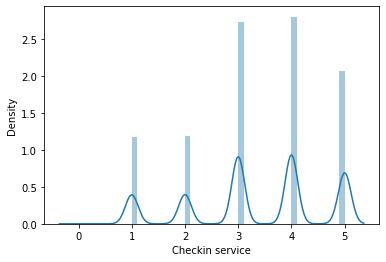

Skewness: 6.821980
Kurtosis: 100.644546


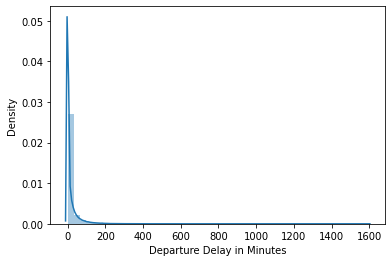

Skewness: 6.678957
Kurtosis: 95.355105


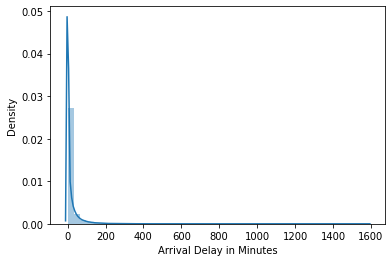

Skewness: -0.190169
Kurtosis: -1.963866


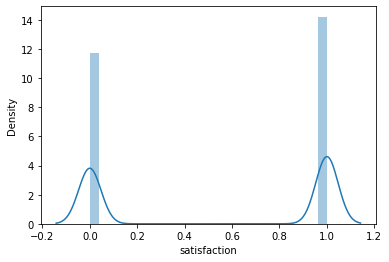

In [ ]:
# Density plot of all the numerical features
for feature in numerical_feats:
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel('Density')
    print("Skewness: %f" % df[feature].skew())
    print("Kurtosis: %f" % df[feature].kurt())
    plt.show()

#Outliers

##Defining Outliers

In [ ]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
    
outliers(df['Age'])

,sub,values
0,IQR,24.0
1,Upper Bound,87.0
2,Lower Bound,-9.0
3,Sum outliers,0.0
4,percentage outliers,0.0


In [ ]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
    
outliers(df['Checkin service'])

,sub,values
0,IQR,1.000000
1,Upper Bound,5.500000
2,Lower Bound,1.500000
3,Sum outliers,15370.000000
4,percentage outliers,11.834001


In [ ]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
    
outliers(df['Flight Distance'])

,sub,values
0,IQR,1185.000000
1,Upper Bound,4321.500000
2,Lower Bound,-418.500000
3,Sum outliers,2581.000000
4,percentage outliers,1.987219


In [ ]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
    
outliers(df['Departure Delay in Minutes'])

,sub,values
0,IQR,12.000000
1,Upper Bound,30.000000
2,Lower Bound,-18.000000
3,Sum outliers,18098.000000
4,percentage outliers,13.934401


In [ ]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
    
outliers(df['Arrival Delay in Minutes'])

,sub,values
0,IQR,13.000000
1,Upper Bound,32.500000
2,Lower Bound,-19.500000
3,Sum outliers,17492.000000
4,percentage outliers,13.467816


**KESIMPULAN**

1. Feature Flight Distance memiliki outliers sebesar 1.9 %
2. Outliers handling pada feature Flight Distance akan dilakukan dengan menggunakan **drop outliers**.
3. Feature Departure Delay in Minutes dan Arrival Delay in Minutes memiliki persentase outliers yang sangat tinggi (hampir 14%).
4. Pada feature Departure Delay in Minutes dan Arrival Delay in Minutes akan dilakukan **drop variabel**, karena dengan jumlah data outliers yang sangat besar tidak memungkinkan untuk dilakukan outliers handling dan apabila variabel tetap digunakan namun data outliers diabaikan makan akan mengganggu feature lainnya.

##Outliers Handling

In [ ]:
df.shape

(129880, 10)

In [ ]:
print(f'Row counts before removing outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

#proses drop outliers pada numerical_feats (kecuali pada feature Checkin service, Departure Delay in Minutes dan Arrival Delay in Minutes) 
numerical_feats_del = ['Flight Distance']
for col in numerical_feats_del:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Row counts after removing outlier: {len(df)}')

Row counts before removing outlier: 129880
Row counts after removing outlier: 127299


In [ ]:
df.shape

(127299, 10)

##Boxplot After Outliers Handling

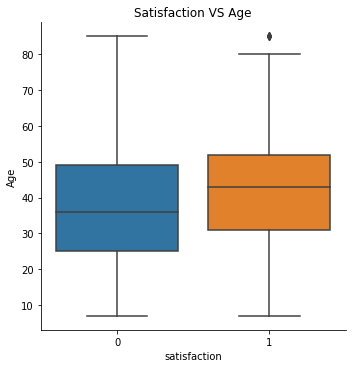

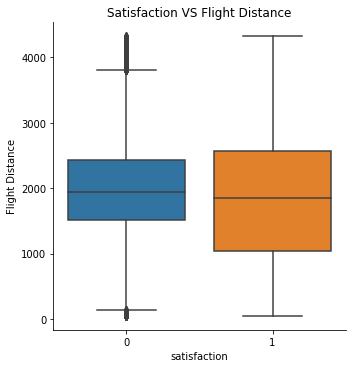

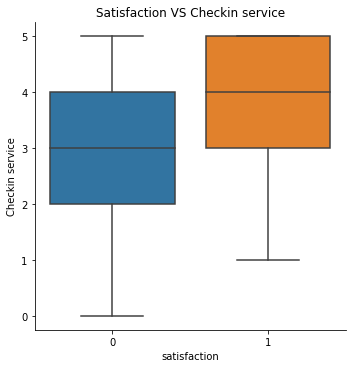

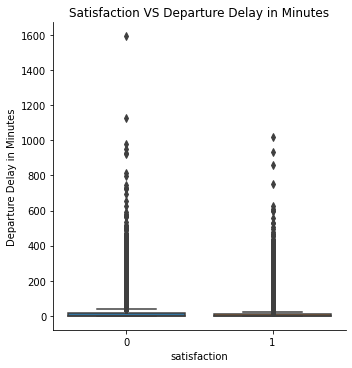

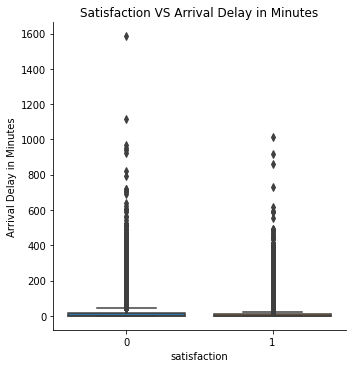

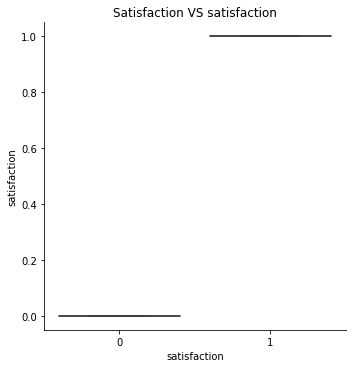

In [ ]:
#boxplot sebelum dilakukan outliers handling
for feature in numerical_feats:
    sns.catplot(x="satisfaction", y=feature, kind="box", data=df)
    plt.title('Satisfaction VS %s' % feature)
    plt.show()

Skewness: -0.028149
Kurtosis: -0.712705


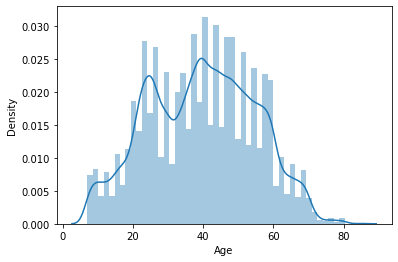

Skewness: 0.150707
Kurtosis: -0.390145


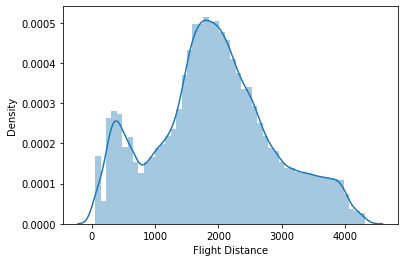

Skewness: -0.392441
Kurtosis: -0.792198


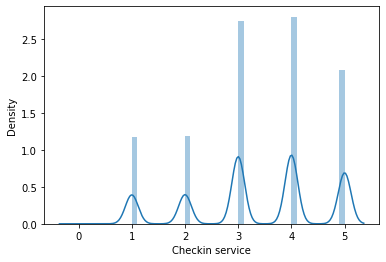

Skewness: 6.814204
Kurtosis: 102.138761


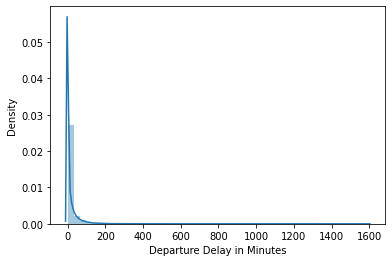

Skewness: 6.688864
Kurtosis: 97.244573


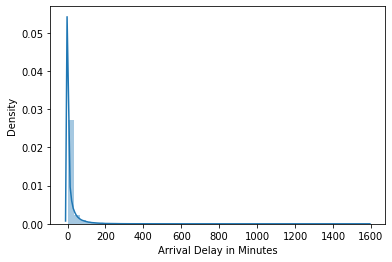

Skewness: -0.181214
Kurtosis: -1.967192


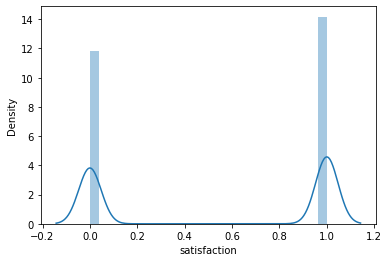

In [ ]:
# Density plot of all the numerical features
for feature in numerical_feats:
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel('Density')
    print("Skewness: %f" % df[feature].skew())
    print("Kurtosis: %f" % df[feature].kurt())
    plt.show()

##Correlation

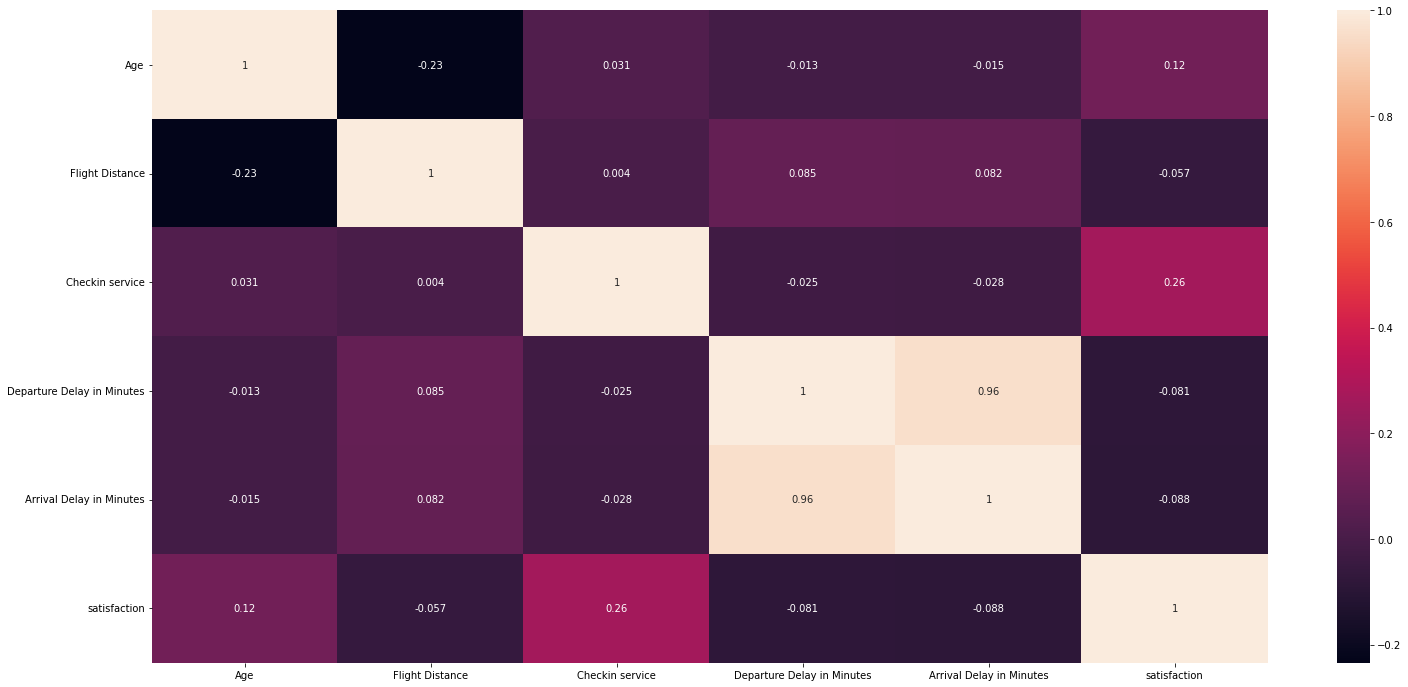

In [ ]:
fig, ax = plt.subplots(figsize = (25,12))
sns.heatmap(df.corr(), annot = True);

**KESIMPULAN**
Bahwa terdapat korelasi yang sangat kuat antara Departure Delay dan Arrival Delay.

#Feature Engineering

##Continous Feature

###Age

Age merupakan feature dengan data continous sehingga harus diubah menjadi beberapa kategori.

In [ ]:
print('Oldest Passenger was of:',df['Age'].max(),'Years')
print('Youngest Passenger was of:',df['Age'].min(),'Years')
print('Average Age on the plane:',df['Age'].mean(),'Years')

Oldest Passenger was of: 85 Years
Youngest Passenger was of: 7 Years
Average Age on the plane: 39.63572376845065 Years


Usia penumpang tertinggi adalah 85 tahun. Kita golongkan usia penumpang menjadi 5 kelas.

In [ ]:
#membuat feature baru = age_cat
df['age_cat']=0
df.loc[df['Age']<=17,'age_cat']=0
df.loc[(df['Age']>17)&(df['Age']<=34),'age_cat']=1
df.loc[(df['Age']>34)&(df['Age']<=51),'age_cat']=2
df.loc[(df['Age']>51)&(df['Age']<=68),'age_cat']=3
df.loc[df['Age']>68,'age_cat']=4
df.head()

,Customer Type,Class,Gender,Age,Type of Travel,Flight Distance,Checkin service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,age_cat
0,Loyal Customer,Eco,Female,65,Personal Travel,265,5,0,0.0,1,3
1,Loyal Customer,Business,Male,47,Personal Travel,2464,2,310,305.0,1,2
2,Loyal Customer,Eco,Female,15,Personal Travel,2138,4,0,0.0,1,0
3,Loyal Customer,Eco,Female,60,Personal Travel,623,4,0,0.0,1,3
4,Loyal Customer,Eco,Female,70,Personal Travel,354,4,0,0.0,1,4


In [ ]:
#melihat jumlah penumpang berdasarkan kategori usia
df['age_cat'].value_counts()

2    49290
1    37538
3    28341
0     9615
4     2515
Name: age_cat, dtype: int64

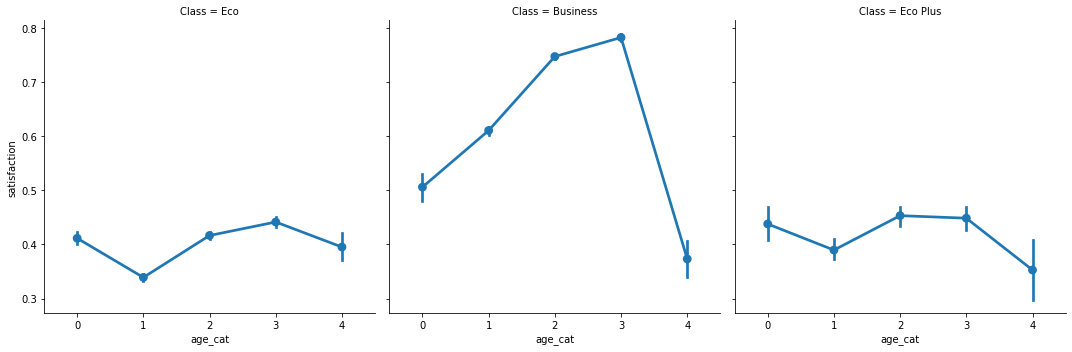

In [ ]:
sns.factorplot('age_cat','satisfaction',data=df,col='Class')
plt.show()

**Analisis :**

1. Satisfaction meningkat dari kategori usia 1 ke 3.
2. Level satisfaction menurun setelah kategori usia ke-3.

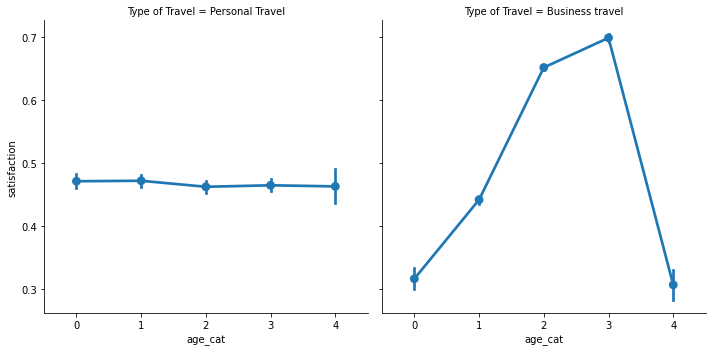

In [ ]:
sns.factorplot('age_cat','satisfaction',data=df,col='Type of Travel')
plt.show()

**Analisis :**

1. Penumpang yang melaksanakan perjalan personal cenderung memiliki level satisfaction yang sama.
2. Satisfaction level penumpang dengan perjalanan bisnis meningkat seiring dengan bertambahnya usia, namun menurun drastis di atas kategori usia ke-3.
3. Terdapat kemungkinan tidak ada penumpang dengan usia di atas 68 tahun yang melakukan perjalanan bisnis.

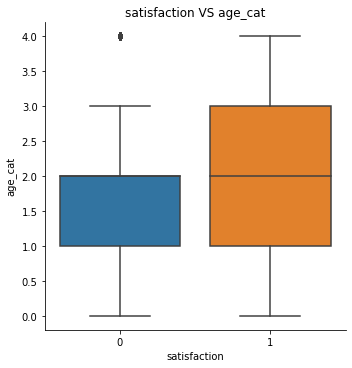

In [ ]:
#boxplot sebelum dilakukan outliers handling
sns.catplot("satisfaction","age_cat", kind="box", data=df)
plt.title('satisfaction VS %s' % 'age_cat')
plt.show()

###Flight Distance

In [ ]:
print('Fartest distance was:',df['Flight Distance'].max())
print('Shortest distance was:',df['Flight Distance'].min())
print('Average distance was:',df['Flight Distance'].mean())

Fartest distance was: 4321
Shortest distance was: 50
Average distance was: 1922.0936142467733


In [ ]:
#membuat feature baru = flight_dist_cat
df['flight_dist_cat']=0
df.loc[df['Flight Distance']<=1390,'flight_dist_cat']=0
df.loc[(df['Flight Distance']>1390)&(df['Flight Distance']<=2780),'flight_dist_cat']=1
df.loc[(df['Flight Distance']>2780)&(df['Flight Distance']<=4171),'flight_dist_cat']=2
df.loc[(df['Flight Distance']>4171)&(df['Flight Distance']<=5561),'flight_dist_cat']=3
df.loc[df['Flight Distance']>5561,'flight_dist_cat']=4
df.head()

,Customer Type,Class,Gender,Age,Type of Travel,Flight Distance,Checkin service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,age_cat,flight_dist_cat
0,Loyal Customer,Eco,Female,65,Personal Travel,265,5,0,0.0,1,3,0
1,Loyal Customer,Business,Male,47,Personal Travel,2464,2,310,305.0,1,2,1
2,Loyal Customer,Eco,Female,15,Personal Travel,2138,4,0,0.0,1,0,1
3,Loyal Customer,Eco,Female,60,Personal Travel,623,4,0,0.0,1,3,0
4,Loyal Customer,Eco,Female,70,Personal Travel,354,4,0,0.0,1,4,0


In [ ]:
df['flight_dist_cat'].value_counts()

1    71470
0    33572
2    21707
3      550
Name: flight_dist_cat, dtype: int64

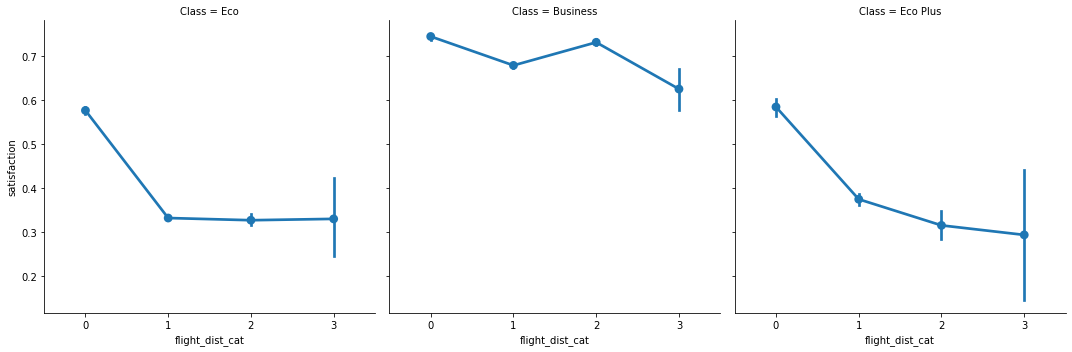

In [ ]:
sns.factorplot('flight_dist_cat','satisfaction',data=df,col='Class')
plt.show()

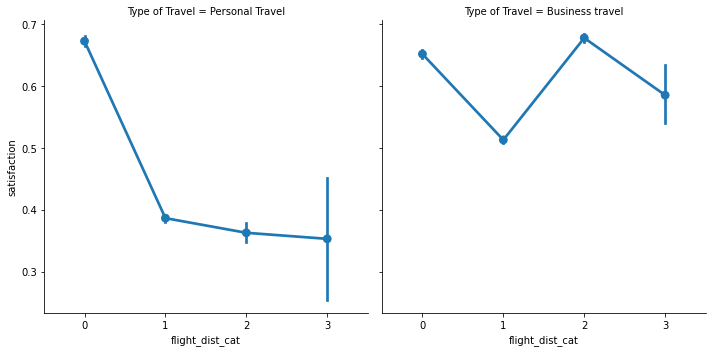

In [ ]:
sns.factorplot('flight_dist_cat','satisfaction',data=df,col='Type of Travel')
plt.show()

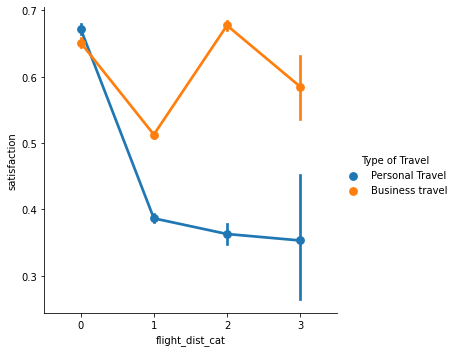

In [ ]:
sns.factorplot('flight_dist_cat','satisfaction',hue='Type of Travel',data=df)
plt.show()

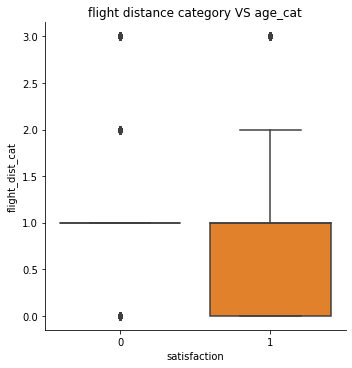

In [ ]:
#boxplot sebelum dilakukan outliers handling
sns.catplot("satisfaction","flight_dist_cat", kind="box", data=df)
plt.title('flight distance category VS %s' % 'age_cat')
plt.show()

##Label Encoding

In [ ]:
df.columns

Index(['Customer Type', 'Class', 'Gender', 'Age', 'Type of Travel',
       'Flight Distance', 'Checkin service', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'satisfaction', 'age_cat',
       'flight_dist_cat'],
      dtype='object')

In [ ]:
df['Customer Type'].value_counts()

Loyal Customer       103576
disloyal Customer     23723
Name: Customer Type, dtype: int64

In [ ]:
df['Class'].value_counts()

Business    59740
Eco         58172
Eco Plus     9387
Name: Class, dtype: int64

In [ ]:
df['Gender'].value_counts()

Female    64652
Male      62647
Name: Gender, dtype: int64

In [ ]:
df['Type of Travel'].value_counts()

Business travel    87233
Personal Travel    40066
Name: Type of Travel, dtype: int64

In [ ]:
df['Customer Type'].replace(['disloyal Customer','Loyal Customer'],[0,1],inplace=True)
df['Class'].replace(['Eco','Eco Plus','Business'],[0,1,2],inplace=True)

In [ ]:
df.head()

,Customer Type,Class,Gender,Age,Type of Travel,Flight Distance,Checkin service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,age_cat,flight_dist_cat
0,1,0,Female,65,Personal Travel,265,5,0,0.0,1,3,0
1,1,2,Male,47,Personal Travel,2464,2,310,305.0,1,2,1
2,1,0,Female,15,Personal Travel,2138,4,0,0.0,1,0,1
3,1,0,Female,60,Personal Travel,623,4,0,0.0,1,3,0
4,1,0,Female,70,Personal Travel,354,4,0,0.0,1,4,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127299 entries, 0 to 129879
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Customer Type               127299 non-null  int64  
 1   Class                       127299 non-null  int64  
 2   Gender                      127299 non-null  object 
 3   Age                         127299 non-null  int64  
 4   Type of Travel              127299 non-null  object 
 5   Flight Distance             127299 non-null  int64  
 6   Checkin service             127299 non-null  int64  
 7   Departure Delay in Minutes  127299 non-null  int64  
 8   Arrival Delay in Minutes    127299 non-null  float64
 9   satisfaction                127299 non-null  int64  
 10  age_cat                     127299 non-null  int64  
 11  flight_dist_cat             127299 non-null  int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 16.7+ MB


##One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
dum_df_gender = pd.get_dummies(df, columns=["Gender"], prefix=["gender_is"] )
dum_df_gender.head()

,Customer Type,Class,Age,Type of Travel,Flight Distance,Checkin service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,age_cat,flight_dist_cat,gender_is_Female,gender_is_Male
0,1,0,65,Personal Travel,265,5,0,0.0,1,3,0,1,0
1,1,2,47,Personal Travel,2464,2,310,305.0,1,2,1,0,1
2,1,0,15,Personal Travel,2138,4,0,0.0,1,0,1,1,0
3,1,0,60,Personal Travel,623,4,0,0.0,1,3,0,1,0
4,1,0,70,Personal Travel,354,4,0,0.0,1,4,0,1,0


In [ ]:
df = dum_df_gender
df.head()

,Customer Type,Class,Age,Type of Travel,Flight Distance,Checkin service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,age_cat,flight_dist_cat,gender_is_Female,gender_is_Male
0,1,0,65,Personal Travel,265,5,0,0.0,1,3,0,1,0
1,1,2,47,Personal Travel,2464,2,310,305.0,1,2,1,0,1
2,1,0,15,Personal Travel,2138,4,0,0.0,1,0,1,1,0
3,1,0,60,Personal Travel,623,4,0,0.0,1,3,0,1,0
4,1,0,70,Personal Travel,354,4,0,0.0,1,4,0,1,0


In [ ]:
dum_df_type_travel = pd.get_dummies(df, columns=["Type of Travel"], prefix=["Type_Travel_is"] )
dum_df_type_travel.head()

,Customer Type,Class,Age,Flight Distance,Checkin service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,age_cat,flight_dist_cat,gender_is_Female,gender_is_Male,Type_Travel_is_Business travel,Type_Travel_is_Personal Travel
0,1,0,65,265,5,0,0.0,1,3,0,1,0,0,1
1,1,2,47,2464,2,310,305.0,1,2,1,0,1,0,1
2,1,0,15,2138,4,0,0.0,1,0,1,1,0,0,1
3,1,0,60,623,4,0,0.0,1,3,0,1,0,0,1
4,1,0,70,354,4,0,0.0,1,4,0,1,0,0,1


In [ ]:
df = dum_df_type_travel
df.head()

,Customer Type,Class,Age,Flight Distance,Checkin service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,age_cat,flight_dist_cat,gender_is_Female,gender_is_Male,Type_Travel_is_Business travel,Type_Travel_is_Personal Travel
0,1,0,65,265,5,0,0.0,1,3,0,1,0,0,1
1,1,2,47,2464,2,310,305.0,1,2,1,0,1,0,1
2,1,0,15,2138,4,0,0.0,1,0,1,1,0,0,1
3,1,0,60,623,4,0,0.0,1,3,0,1,0,0,1
4,1,0,70,354,4,0,0.0,1,4,0,1,0,0,1


##Drop Variabel

In [ ]:
df.drop(['Age', 'Flight Distance','Arrival Delay in Minutes', 'Departure Delay in Minutes'],axis=1,inplace=True)

##Correlation

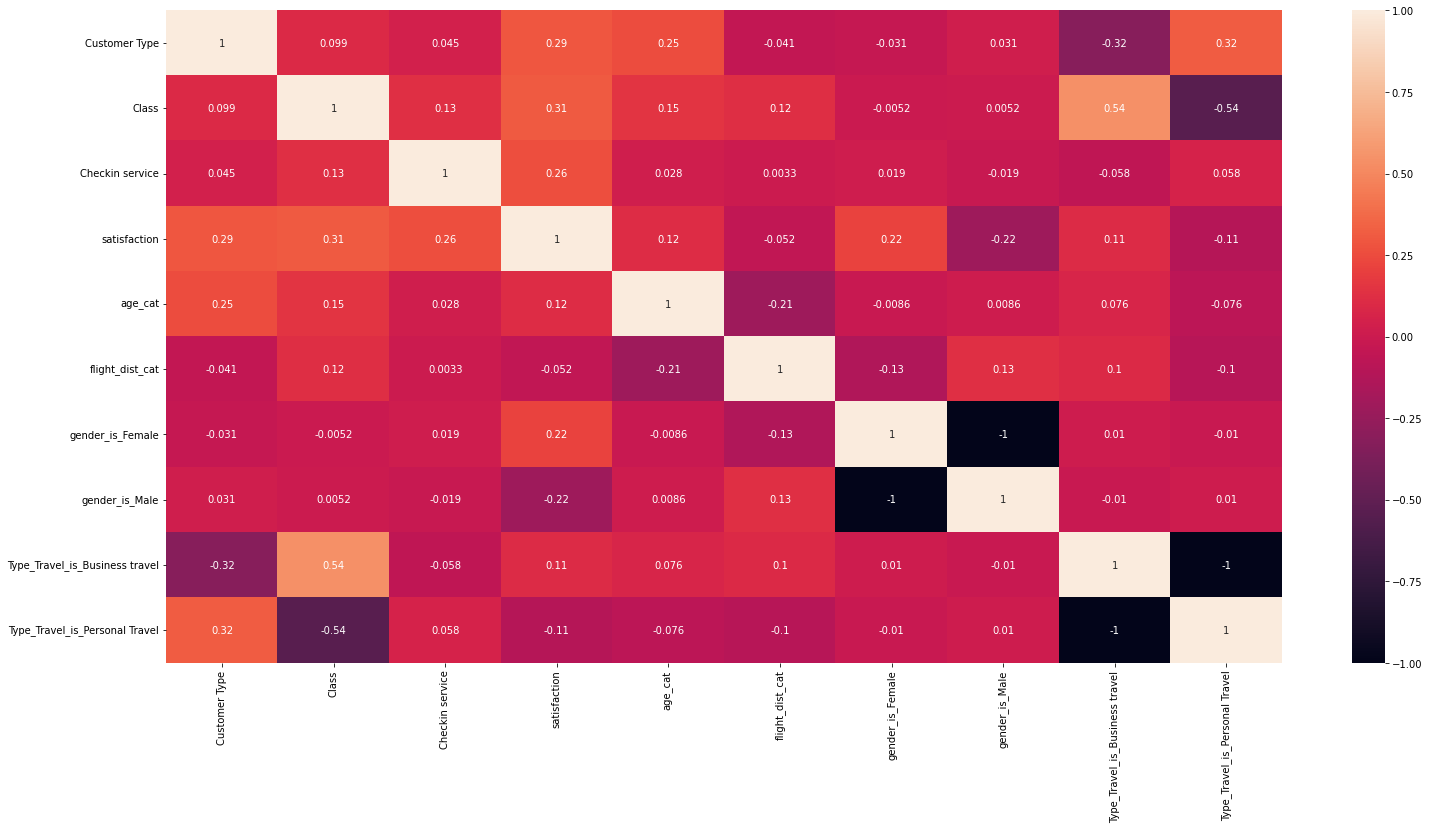

In [ ]:
fig, ax = plt.subplots(figsize = (25,12))
sns.heatmap(df.corr(), annot = True);

**KESIMPULAN**

1. Terdapat korelasi positif antara Business Travel dengan Class
2. Terdapat korelasi negatif antara Personal Travel dengan Class

#Modeling Data

##Split Data

In [ ]:
x = df.drop(['satisfaction'],axis=1)
y = df['satisfaction']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

##Import Library

In [ ]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

##KNN

In [ ]:
#Sebelum hyperparametertuning
# Instantiate a KNNClassifier 'knn' with a 20 neighbors
knn = KNeighborsClassifier()

# Fit knn to the training set
knn.fit(x_train, y_train)

# Predict test set labels
y_pred_knn = knn.predict(x_test)
print ('hasil akurasi dari data training: ', knn.score(x_train, y_train))
print ('hasil akurasi dari data testing: ', knn.score(x_test, y_test))

hasil akurasi dari data training:  0.7816749968086882
hasil akurasi dari data testing:  0.7811861743912019


In [ ]:
def draw_confusion_matrix(cm):
    plt.figure(figsize=(10,8))
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

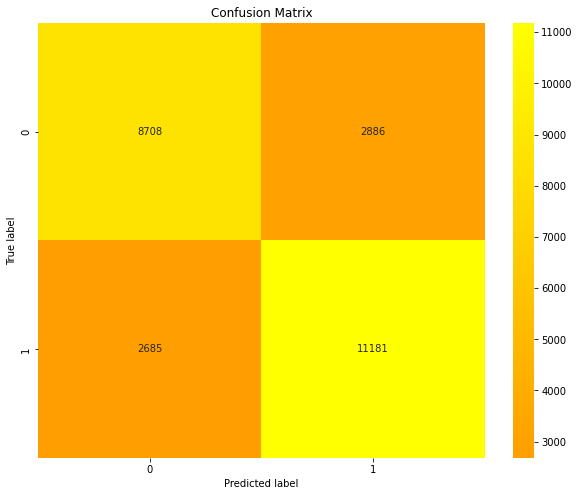

In [ ]:
cm_knn = confusion_matrix(y_test,y_pred_knn)
draw_confusion_matrix(cm_knn)

In [ ]:
print(precision_score(y_test,y_pred_knn))
print(recall_score(y_test,y_pred_knn))

0.7948389848581787
0.8063608827347468


##Logistic Regression

In [ ]:
# Instantiate logreg
logreg = LogisticRegression()

# Fit logreg to the training set
logreg.fit(x_train, y_train)

# Predict test set labels
y_pred_logreg = logreg.predict(x_test)

print ('hasil akurasi dari data training: ', logreg.score(x_train, y_train))
print ('hasil akurasi dari data testing: ', logreg.score(x_test, y_test))

hasil akurasi dari data training:  0.7545733952611475
hasil akurasi dari data testing:  0.7522388059701492


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Melakukan Scaling ke dataset kita
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Memodelkan ulang
# Instantiate logreg
logreg = LogisticRegression()

# Fit logreg to the training set
logreg.fit(x_train, y_train)

# Predict test set labels
y_pred_logreg = logreg.predict(x_test)

print ('hasil akurasi dari data training: ', logreg.score(x_train, y_train))
print ('hasil akurasi dari data testing: ', logreg.score(x_test, y_test))

hasil akurasi dari data training:  0.7545832146819981
hasil akurasi dari data testing:  0.752356637863315


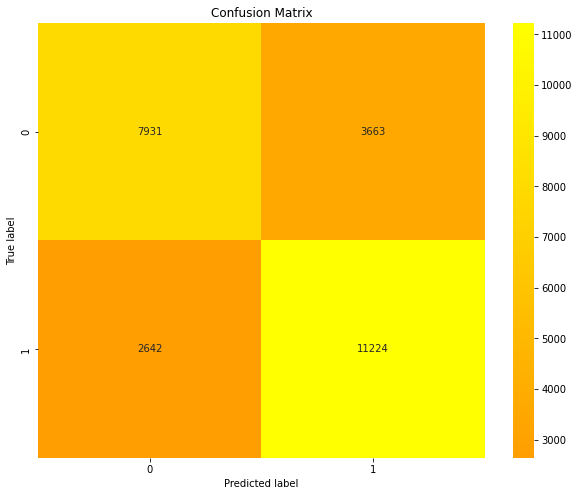

precision score : 0.7539463961845906
recall score : 0.8094619933650656


In [ ]:
cm_logreg = confusion_matrix(y_test,y_pred_logreg)
draw_confusion_matrix(cm_logreg)
print('precision score :' , precision_score(y_test,y_pred_logreg))
print('recall score :' , recall_score(y_test,y_pred_logreg))

##Decision Tree

In [ ]:
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 10
dt = DecisionTreeClassifier()

# Fit dt to the training set
dt.fit(x_train, y_train)

# Predict test set labels
y_pred_dt = dt.predict(x_test)

print ('hasil akurasi dari data training: ', dt.score(x_train, y_train))
print ('hasil akurasi dari data testing: ', dt.score(x_test, y_test))

hasil akurasi dari data training:  0.8062726460393366
hasil akurasi dari data testing:  0.8043205027494108


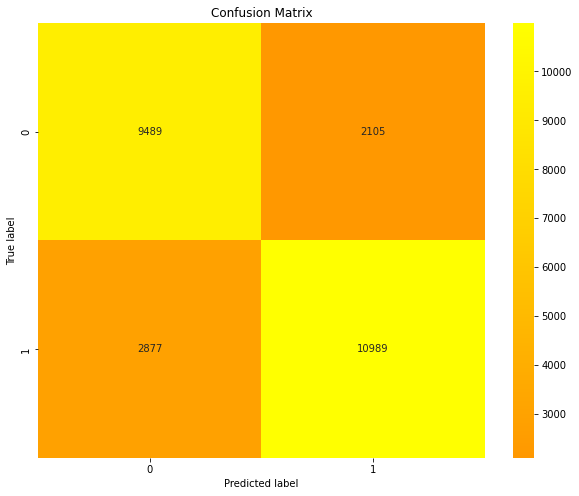

precision score : 0.8392393462654651
recall score : 0.7925140631761143


In [ ]:
cm_dt = confusion_matrix(y_test,y_pred_dt)
draw_confusion_matrix(cm_dt)
print('precision score :' , precision_score(y_test,y_pred_dt))
print('recall score :' , recall_score(y_test,y_pred_dt))

##Random Forest

In [ ]:
# Instantiate a RandomForestClassifier 'rf' with number of tree 15
rf = RandomForestClassifier()

# Fit dt to the training set
rf.fit(x_train, y_train)

# Predict test set labels
y_pred_rf = rf.predict(x_test)

print ('hasil akurasi dari data training: ', rf.score(x_train, y_train))
print ('hasil akurasi dari data testing: ', rf.score(x_test, y_test))

hasil akurasi dari data training:  0.8062431877767849
hasil akurasi dari data testing:  0.8038098978790259


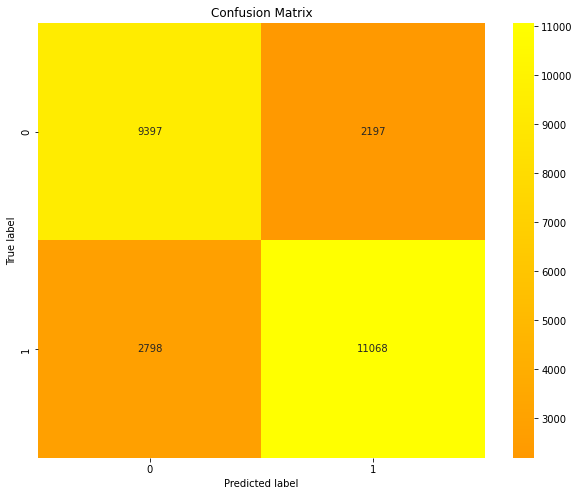

precision score : 0.834376177911798
recall score : 0.7982114524736766


In [ ]:
cm_rf = confusion_matrix(y_test,y_pred_rf)
draw_confusion_matrix(cm_rf)
print('precision score :' , precision_score(y_test,y_pred_rf))
print('recall score :' , recall_score(y_test,y_pred_rf))

##Gaussian Naive Bayes

In [ ]:
nb = GaussianNB()

# Fit dt to the training set
nb.fit(x_train, y_train)

# Predict test set labels
y_pred_nb = nb.predict(x_test)

print ('hasil akurasi dari data training: ', nb.score(x_train, y_train))
print ('hasil akurasi dari data testing: ', nb.score(x_test, y_test))

hasil akurasi dari data training:  0.7499189897779829
hasil akurasi dari data testing:  0.747643362136685


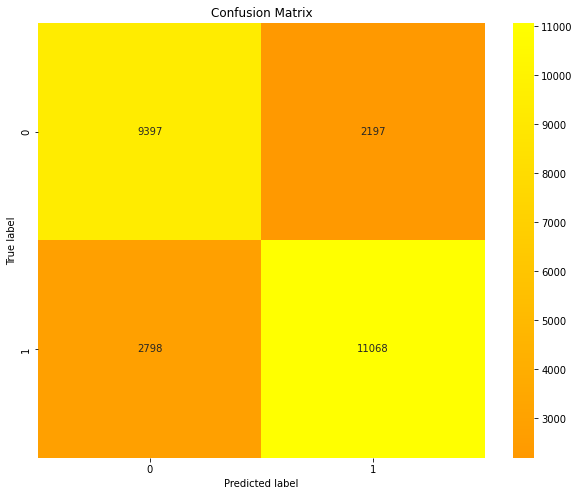

precision score : 0.834376177911798
recall score : 0.7982114524736766


In [ ]:
cm_nb = confusion_matrix(y_test,y_pred_rf)
draw_confusion_matrix(cm_nb)
print('precision score :' , precision_score(y_test,y_pred_rf))
print('recall score :' , recall_score(y_test,y_pred_rf))

##LightGBM

In [ ]:
from lightgbm import LGBMClassifier,plot_importance

In [ ]:
#sebelum hyperparametertuning
light = LGBMClassifier()
light.fit(x_train,y_train)

y_pred = light.predict(x_test)

print ('hasil akurasi dari data training: ', light.score(x_train, y_train))
print ('hasil akurasi dari data testing: ', light.score(x_test, y_test))

hasil akurasi dari data training:  0.8046524415989945
hasil akurasi dari data testing:  0.8064021995286724


In [ ]:
light = LGBMClassifier(n_estimators=200,learning_rate=0.11,
                      min_child_samples=30,num_leaves=25)
light.fit(x_train,y_train)

y_pred = light.predict(x_test)

print ('hasil akurasi dari data training: ', light.score(x_train, y_train))
print ('hasil akurasi dari data testing: ', light.score(x_test, y_test))

hasil akurasi dari data training:  0.8051041349581202
hasil akurasi dari data testing:  0.8069520816967792


##XGBoost

In [ ]:
# pip
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb

xgb = xgb.XGBClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

# Fit
xgb.fit(x_train, y_train)

# Predict
y_pred_xgb = xgb.predict(x_test)

print ('hasil akurasi dari data training: ', xgb.score(x_train, y_train))
print ('hasil akurasi dari data testing: ', xgb.score(x_test, y_test))

hasil akurasi dari data training:  0.7998016476988187
hasil akurasi dari data testing:  0.8006284367635507


#Cross Validation

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['KNN','Logistic Regression','Decision Tree','Random Forest', 'Gaussian Naive Bayes','Light GBM','XGBoost']
models=[KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB(), LGBMClassifier(), xgb]
for i in models:
    model = i
    cv_result = cross_val_score(model,x ,y, cv = kfold ,scoring = "accuracy")
    cv_result= cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers) #hasil terbaik adalah nilai dari rata-rata K-folds       
new_models_dataframe2

,CV Mean,Std
KNN,0.730227,0.152315
Logistic Regression,0.675286,0.148842
Decision Tree,0.742206,0.158650
Random Forest,0.741687,0.160511
Gaussian Naive Bayes,0.681955,0.156912
Light GBM,0.741271,0.161962
XGBoost,0.739802,0.175148


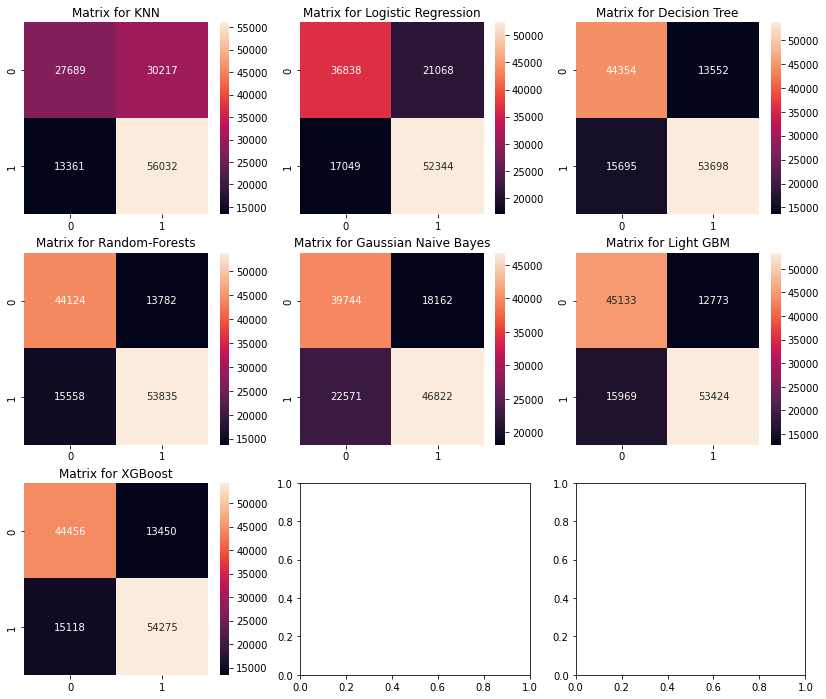

In [ ]:
f,ax=plt.subplots(3,3,figsize=(14,12))
y_pred = cross_val_predict(KNeighborsClassifier(),x,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for KNN')
y_pred = cross_val_predict(LogisticRegression(),x,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),x,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(RandomForestClassifier(),x,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(GaussianNB(),x,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Gaussian Naive Bayes')
y_pred = cross_val_predict(LGBMClassifier(),x,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Light GBM')
y_pred = cross_val_predict(xgb,x,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for XGBoost')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

Dari hasil Cross Validation dan dengan bantuan Confusion Matrix, dapat disimpulkan bahwa model terbaik adalah :
1. KNN
2. XGBoost
3. Random Forest

#Hyperparamater Tuning

##KNN

In [ ]:
# Menentukan K yang terbaik
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

accuracy = accuracy_score(knn.predict(x_test), y_test)
print(accuracy)
n_neighbors = np.array([65,70,75])
param_grid = dict(n_neighbors=n_neighbors)
grid = GridSearchCV(estimator=knn, param_grid=param_grid)
grid.fit(x_train, y_train)
print(grid.best_score_)
print(grid.best_estimator_.n_neighbors)

0.7761979575805185
0.8009897779709341
70


In [ ]:
# KNN setelah hyperparameter tuning 
# Instantiate a KNNClassifier 'knn' with a 30 neighbors
knn = KNeighborsClassifier(n_neighbors=70)

# Fit knn to the training set
knn.fit(x_train, y_train)

# Predict test set labels
y_pred_knn = knn.predict(x_test)
print ('hasil akurasi dari data training: ', knn.score(x_train, y_train))
print ('hasil akurasi dari data testing: ', knn.score(x_test, y_test))

hasil akurasi dari data training:  0.8039159850352027
hasil akurasi dari data testing:  0.8043205027494108


##XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    'n_estimators': range(50, 250, 50),
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Init Grid Search
grid_cv = GridSearchCV(xgb, param_grid=parameters,scoring="roc_auc")

# Fit
_ = grid_cv.fit(x_train, y_train)
print(grid_cv.best_estimator_)

XGBClassifier(n_estimators=200)


In [ ]:
import xgboost as xgb

xgb = xgb.XGBClassifier(n_estimators = 200)
# Fit
xgb.fit(x_train, y_train)

# Predict
y_pred_xgb = xgb.predict(x_test)

print ('hasil akurasi dari data training: ', xgb.score(x_train, y_train))
print ('hasil akurasi dari data testing: ', xgb.score(x_test, y_test))

hasil akurasi dari data training:  0.8031500702088591
hasil akurasi dari data testing:  0.8036135113904164


##Random Forest

In [ ]:
param_grid = { 
    'n_estimators': [100,200,300]
}

CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rfc.fit(x_train, y_train)
print(CV_rfc.best_params_)

{'n_estimators': 100}


In [ ]:
# Instantiate a RandomForestClassifier 'rf' with number of tree 15
rf = RandomForestClassifier(n_estimators=100)

# Fit dt to the training set
rf.fit(x_train, y_train)

# Predict test set labels
y_pred_rf = rf.predict(x_test)

print ('hasil akurasi dari data training: ', rf.score(x_train, y_train))
print ('hasil akurasi dari data testing: ', rf.score(x_test, y_test))

hasil akurasi dari data training:  0.8062726460393366
hasil akurasi dari data testing:  0.8042026708562451


#Feature Importance

Text(0.5, 1.0, 'Feature Importance in XGBoost')

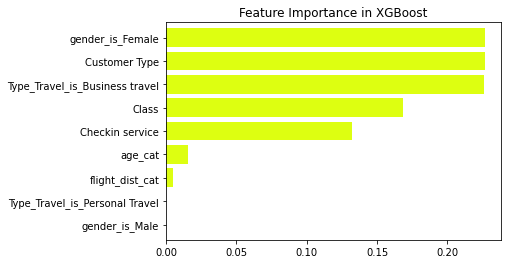

In [ ]:
f,ax=plt.subplots()
model=xgb
model.fit(x,y)
pd.Series(model.feature_importances_,x.columns).sort_values(ascending=True).plot.barh(width=0.8,color='#ddff11').set_title('Feature Importance in XGBoost')

Text(0.5, 1.0, 'Feature Importance in Random Forests')

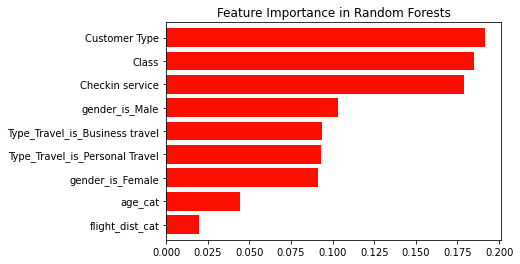

In [ ]:
f,ax=plt.subplots()
model=RandomForestClassifier(n_estimators=200)
model.fit(x,y)
pd.Series(model.feature_importances_,x.columns).sort_values(ascending=True).plot.barh(width=0.8,color='#FD0F00').set_title('Feature Importance in Random Forests')

Fitur yang paling mempengaruhi target :
1. Customer Type
2. Class
3. Checkin Service